In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
    
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [9]:
LEARNING_RATE = 0.001

In [10]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 200000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 5382.0118
Iteration 20000 : Loss 4879.4688
Iteration 30000 : Loss 4505.6833
Iteration 40000 : Loss 4223.9779
Iteration 50000 : Loss 4008.5418
Iteration 60000 : Loss 3841.1663
Iteration 70000 : Loss 3708.9668
Iteration 80000 : Loss 3602.7906
Iteration 90000 : Loss 3516.1054
Iteration 100000 : Loss 3444.2214
Iteration 110000 : Loss 3383.7477
Iteration 120000 : Loss 3332.2118
Iteration 130000 : Loss 3287.7925
Iteration 140000 : Loss 3249.1328
Iteration 150000 : Loss 3215.2081
Iteration 160000 : Loss 3185.2340
Iteration 170000 : Loss 3158.6001
Iteration 180000 : Loss 3134.8241
Iteration 190000 : Loss 3113.5186
19.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2907.4067635363895)

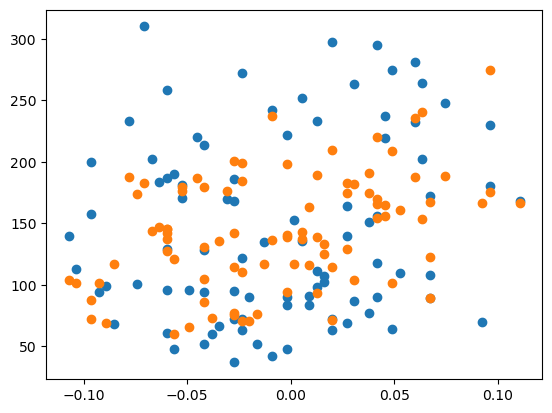

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()